## About the Dataset

> The dataset contains 2 folders
  
> * Infected
> * Uninfected  
  
> And a total of 27,558 images.

## Task
> To come up with a model that can predict label for each image

# Libraries

In [1]:
# file operations
import os
# to list files
import glob

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical, plot_model
# process image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# callback functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Data

### List files

In [2]:
# list of files in the dataset
os.listdir('../input/cell-images-for-detecting-malaria/cell_images/cell_images')

['Parasitized', 'Uninfected']

In [3]:
# list all the images in the directory Parasitized
parasitized = glob.glob('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/*.png')

# no. of files in the directory Parasitized
print('No. of files in the directory Parasitized', len(parasitized))

# first few images
parasitized[:5]

No. of files in the directory Parasitized 13779


['../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C136P97ThinF_IMG_20151005_140538_cell_96.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C51AP12thinF_IMG_20150724_155046_cell_102.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C137P98ThinF_IMG_20151005_155704_cell_54.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C82P43ThinF_IMG_20150817_124010_cell_191.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/C68P29N_ThinF_IMG_20150819_134712_cell_31.png']

In [4]:
# list all the images in the directory Uninfected
uninfected = glob.glob('../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/*.png')

# no. of files in the directory Uninfected
print('No. of files in the directory Uninfected', len(uninfected))

# first few images
uninfected[:5]

No. of files in the directory Uninfected 13779


['../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C71P32_ThinF_IMG_20150813_163120_cell_70.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C138P99ThinF_IMG_20151005_173241_cell_40.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C69P30N_ThinF_IMG_20150819_135705_cell_57.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C215ThinF_IMG_20151106_133012_cell_77.png',
 '../input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C220ThinF_IMG_20151106_154510_cell_72.png']

# Images

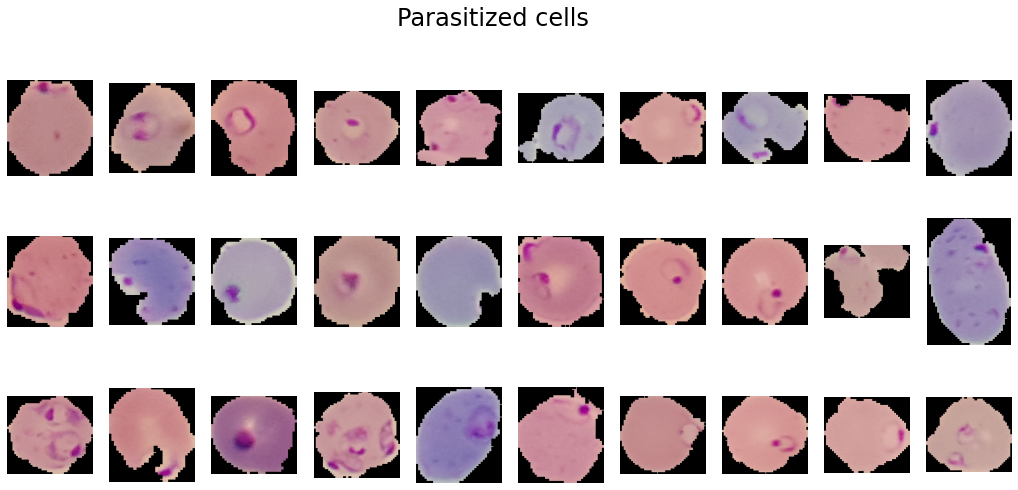

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Parasitized cells', fontsize=24)

for ind, img_src in enumerate(parasitized[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

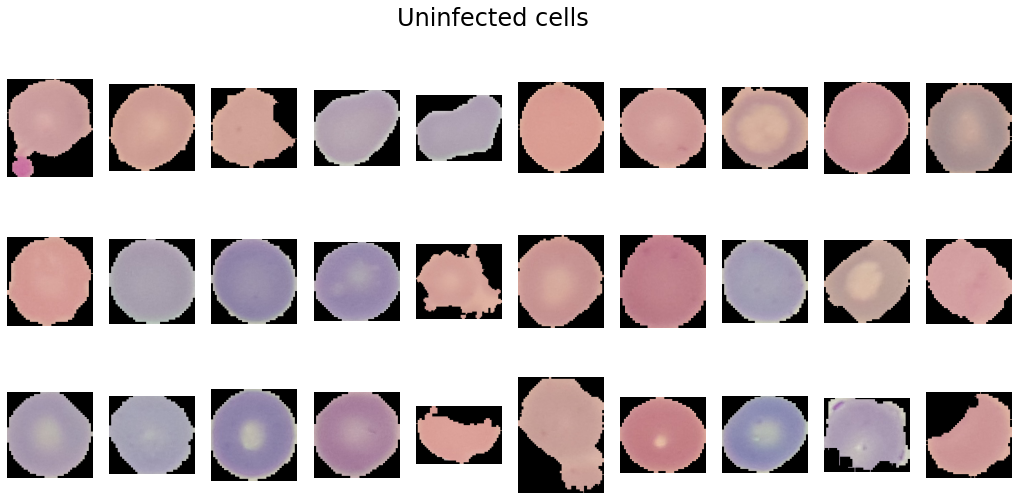

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Uninfected cells', fontsize=24)

for ind, img_src in enumerate(uninfected[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

# Model

### Model parameters

In [7]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels
TARGET_SIZE = 64
EPOCHS = 10

### Model initialization

In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

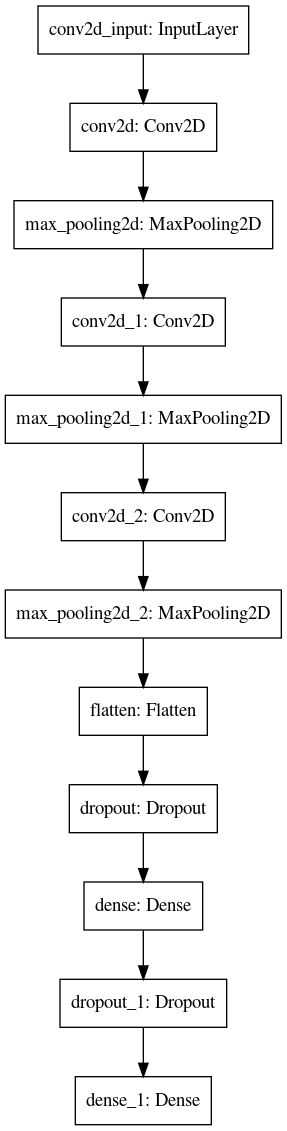

<Figure size 360x720 with 0 Axes>

In [9]:
plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.png")

### Data generator

In [10]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)

train_data = datagen.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory('../input/cell-images-for-detecting-malaria/cell_images/cell_images',
                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


### Callback functions

In [11]:
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta = 0.01,
                               patience=5)

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

### Fit model

In [12]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1, 
                    callbacks=[early_stopping, model_save])

Epoch 1/10
193/193 [==============================] - 224s 1s/step - loss: 0.6442 - accuracy: 0.6587 - val_loss: 0.4765 - val_accuracy: 0.8318
Epoch 2/10
193/193 [==============================] - 184s 951ms/step - loss: 0.4022 - accuracy: 0.8601 - val_loss: 0.3741 - val_accuracy: 0.8727
Epoch 3/10
193/193 [==============================] - 183s 947ms/step - loss: 0.2747 - accuracy: 0.9065 - val_loss: 0.2256 - val_accuracy: 0.9237
Epoch 4/10
193/193 [==============================] - 182s 941ms/step - loss: 0.2346 - accuracy: 0.9220 - val_loss: 0.2160 - val_accuracy: 0.9198
Epoch 5/10
193/193 [==============================] - 179s 930ms/step - loss: 0.2302 - accuracy: 0.9218 - val_loss: 0.2251 - val_accuracy: 0.9175
Epoch 6/10
193/193 [==============================] - 180s 934ms/step - loss: 0.2185 - accuracy: 0.9265 - val_loss: 0.2024 - val_accuracy: 0.9250
Epoch 7/10
193/193 [==============================] - 180s 930ms/step - loss: 0.2096 - accuracy: 0.9278 - val_loss: 0.2131 - va

### Plot metrics

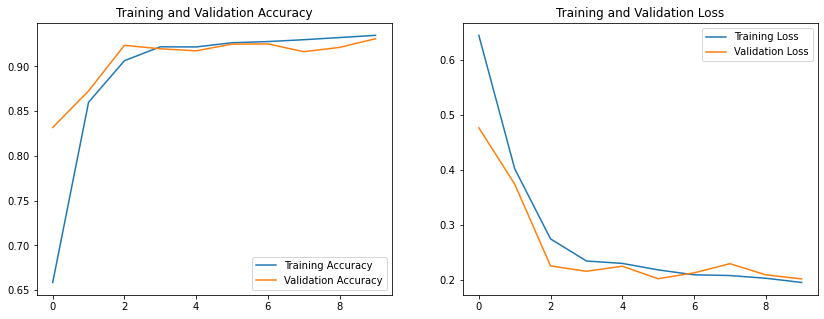

In [13]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()